# LIBRAIRIES

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics
import math
from math import log as log

# CLASSES

In [3]:
class individu:

    def __init__(self,index):
        self.index = index
        self.exp = None
        self.choice = None
        self.desserts = None
        self.tdr = None
        self.tdr_all = None

        self.choix = []
        self.influence1 = []
        self.influence2 = []
        self.proposition1 = []
        self.proposition2 = []

        self.beta = None
        self.alpha = None
        self.beta_lineaire = None
        self.D = None

        self.maxLL_sans_influence = None
        self.maxLL_lineaire = None
        self.maxLL_Declenchement = None
        
        self.best_model = None

        
    def setMODELE(self,string):
        self.best_model = string
    def getMODELE(self):
        return self.best_model

    def getLL0(self):
        return self.maxLL_sans_influence
    def getLL1(self):
        return self.maxLL_lineaire
    def getLL2(self):
        return self.maxLL_Declenchement

    def setLL0(self,LL):
        self.maxLL_lineaire = LL
    def setLL1(self,LL):
        self.maxLL_sans_influence = LL
    def setLL2(self,LL):
        self.maxLL_Declenchement = LL

    def setbeta(self,b):
        self.beta = b
    def setbeta_lineaire(self,b):
        self.beta_lineaire = b
    def setalpha(self,a):
        self.alpha = a
    def setD(self,d):
        self.D = d

    def getD(self):
        return self.D
    def getBeta(self):
        return self.beta
    def getBeta_lineaire(self):
        return self.beta_lineaire
    def getAlpha(self):
        return self.alpha

    def getId(self):
        return self.index

    def getExp(self):
        return self.exp
    def getChoice(self):
        return self.choice
    def getTdr(self):
        return self.tdr
    def getChoix(self):
        return self.choix
    def getDesserts(self):
        return self.desserts
    def getInfluence_1and2(self):
        return self.influence1, self.influence2
    def getP1(self):
        return self.proposition1
    def getP2(self):
        return self.proposition2    

    def generateDesserts(self,string):
        fichier_desserts = 'DESSERTS/desserts_'+self.index+'.csv'
        d = pd.read_csv(fichier_desserts)
        d.loc[len(d)] = [d.columns[0],d.columns[1]]
        d.columns = ['s','ns']

        sns = ['s','s','s','s','s','s','s','ns','ns','ns','ns','ns','ns','ns']
        des = d['s'].tolist()+d['ns'].tolist()
        note = []

        desserts =  {'desserts' : [], 'note' : [], 'sns' : []}


        d = pd.DataFrame(string.get('valeur').loc[self.index]).transpose()

        for i in des:
            note.append(d.loc[d.index[0],i])

        for i in range(len(des)):
            desserts['desserts'].append(des[i])
            desserts['note'].append(note[i])
            desserts['sns'].append(sns[i])

        self.desserts = pd.DataFrame(desserts).set_index('desserts')

    def generateInfluence(self):
        for i in self.exp.index :
            count1 = 0
            count2 = 0
            for j in range(1,6):
                if j == 5:
                    self.influence1.append(count1)
                    self.influence2.append(count2)
                elif self.exp.loc[i,'P'+str(j)] == self.exp.loc[i,'Proposition 1']:
                    count1 = count1 + 1
                elif self.exp.loc[i,'P'+str(j)] == self.exp.loc[i,'Proposition 2']:
                    count2 = count2 + 1

    def generateProposition(self):
        self.proposition1 = self.exp['Proposition 1'].tolist()
        self.proposition2 = self.exp['Proposition 2'].tolist()

    def generateChoice(self):
        tdr = pd.read_csv('EXPERIENCE/desserts_'+self.index+'_choice.csv')
        tdr.loc[len(tdr)] = [tdr.columns[0],int(tdr.columns[1])]
        tdr.columns = ['dessert','tdr']
        tdr = tdr.set_index('dessert')

        notation = []
        for i in tdr.index :
            notation.append(self.desserts.loc[i,'note'])

        result = tdr
        result['note'] = notation

        self.choice = result
        self.tdr = self.choice.sum()[0]*0.0000166667
        self.choix = self.choice.index
    
    def generateExp(self):
      #flemme de réecrire tdr = exp
        tdr = pd.read_csv('EXPERIENCE/desserts_'+self.index+'_exp.csv')
        tmp = pd.DataFrame({'Proposition 1' : [tdr.columns[0]] ,'Proposition 2' : [tdr.columns[1]], 'Nothing' : [tdr.columns[2]], 'P1' : [tdr.columns[3][:-2]],'P2' : [tdr.columns[4][:-2]] ,'P3' : [tdr.columns[5][:-2]] ,'P4' : [tdr.columns[6][:-2]] })
        tdr.columns = tmp.columns
        index = [i for i in range(82)]
        self.exp = pd.concat([tmp,tdr])
        self.exp.index = index
      

    def print(self,string):
        if string == 'choice':
            display(self.choice)
        elif string == 'exp':
            display(self.exp)
        elif string == 'index':
            print('numéro n°',self.index)
            
            
            
            
    def sns(self):
        df = self.getDesserts()
        choix = self.getChoix()
        s = []
        ns = []

        for i in choix :
            if df.loc[i,'sns'] == 's':
                s.append(df.loc[i,'sns'])
            else:
                ns.append(df.loc[i,'sns'])

        plt.bar(x = ['Non Sain','Sain'], height = [s.count('s'),ns.count('ns')])
        plt.title(self.getId())
        plt.show()
            
    def droite_gauche(self,string):
        df = self.getDesserts()
        i1, i2 =self.getInfluence_1and2()
        i1 = i1[1:]
        i2 = i2[1:]
        P1 = self.getP1()[1:]
        P2 = self.getP2()[1:]
        choix = self.getChoix()


        P1ouP2 = []

        count = 0
        for i in choix :
            if i == P1[count]:
                P1ouP2.append(1)
            else:
                P1ouP2.append(2)
            count = count + 1

        if string == 'yes':
            fig, ax=plt.subplots(dpi=100)
            N, bins, patches = ax.hist(P1ouP2, bins = 2, edgecolor='white')
            patches[0].set_facecolor('r')
            patches[1].set_facecolor('b')
            plt.xticks([1,2],['Choix Gauche','Choix Droite'])
            plt.title(self.getId())
            plt.show()

        return P1ouP2.count(1),P1ouP2.count(2)
    

    def diff_tdr(self):
        desserts = self.getDesserts()
        P1 = list(self.getP1()[1:])
        P2 = list(self.getP2()[1:])
        CHOIX = self.getChoix()
        tdr = self.getChoice()
        tdr = tdr['tdr'].tolist()
        ABSCISSE = []
        HUE = []

        for i in range(len(P1)):
            ABSCISSE.append(desserts.loc[P1[i],'note']-desserts.loc[P2[i],'note'])
            if P1[i] == CHOIX[i]:
                HUE.append('Choix 1')
            else:
                HUE.append('Choix 2')



        fig, ax=plt.subplots(dpi=100)
        sns.swarmplot(x = ABSCISSE, y = tdr, hue = HUE, palette = 'hls',size = 4)
        plt.xlabel('Note(Choix 1) - Note(Choix 2)')
        plt.ylabel('Temps de réponse en ms')
        plt.title(self.getId())
        plt.show()

In [4]:
class banque:
### Tout me semble assez explicite donc je ne mets pas de commentaires

    def __init__(self):
        self.sondage = None
        self.limesurvey = None
        self.limesurvey_all = None

        self.valeur = None
        self.frequence = None
        self.sante = None

        self.restriction = None

        self.tdr = None

    def setTdr(self,tdr):
        self.tdr = tdr

    def getIndex(self):
        return self.limesurvey.index
    
    def getSondage(self):
        return self.sondage
    def getLimesurvey(self):
        return self.limesurvey
    def getRestriction(self):
        return self.restriction

    def generateSondage(self):
        data_rattrapage = pd.read_excel('sondage_rattrapage.xlsx')
        data1 = pd.read_csv("sondage_final.csv",encoding='utf-8')
        frames = [data_rattrapage,data1]
        data = pd.concat(frames, sort=False,ignore_index=False)
        data.index = [i for i in range(0,len(data.index)) ]
        for i in data.index:
            data['heure'][i] = data['heure'][i].split(",")[1][2:7]
            data['jour'][i] = eval(data['jour'][i].split(",")[1].replace(')',''))
            data['jour'][i] = data['jour'][i][5:]
            jour = data['jour'][i][3:]
            mois = data['jour'][i][:2]
            data['jour'][i] = str(jour+'/'+mois)
            data['habitude'][i] = eval(data['habitude'][i].split(",")[1].replace(')',''))
            data['faim'][i] = eval(data['faim'][i].split(",")[1].replace(')',''))
            data['soif'][i] = eval(data['soif'][i].split(",")[1].replace(')',''))
            data['estomac'][i] = eval(data['estomac'][i].split(",")[1].replace(')',''))
            data['miam'][i] = eval(data['miam'][i].split(",")[1].replace(')',''))
            data['quantite'][i] = eval(data['quantite'][i].split(",")[1].replace(')',''))
            data['but'][i] = data['but'][i].replace('but','')
            data['but'][i] = data['but'][i].replace(',',' ')
            data['but'][i] = eval(data['but'][i])
            data['adresse'][i] = data['adresse'][i].replace('adresse','')
            data['adresse'][i] = data['adresse'][i].replace(',',' ')
            data['adresse'][i] = eval(data['adresse'][i])
            data["id"][i] = data["id"][i].replace('desserts_','')
        data['heure'][1] = '7:15'
        data['heure'][19] = '22:00'
        data['heure'][0] = '2:30'
        data['heure'][2] = '9:00'
        data['heure'][3] = '8:00'
        data = data.set_index('id')

        for i in data.index :
            print(i)
            print(data.loc[i,'faim'], type(data.loc[i,'faim']))
            data.loc[i,'faim'] = int(data.loc[i,'faim'])
            data.loc[i,'miam'] = int(data.loc[i,'miam'])
            data.loc[i,'quantite'] = int(data.loc[i,'quantite'])
            data.loc[i,'estomac'] = int(data.loc[i,'estomac'])
            data.loc[i,'soif'] = int(data.loc[i,'soif'])
        data['score de satiete'] = (data['faim']+data['miam']+data['quantite']-data['estomac'])/4
        self.sondage = data

    def generateLimesurvey(self):
        limesurvey = pd.read_excel('limesurvey_total.xlsx')
        limesurvey_all = limesurvey.set_index('id')
        limesurvey = limesurvey_all.loc[self.sondage.index]
        limesurvey['IMC'] = limesurvey['Votre poids en kg'] / ((limesurvey['Votre taille en cm']/100)*(limesurvey['Votre taille en cm']/100))
        self.limesurvey = limesurvey
        self.limesurvey_all = limesurvey_all

        self.restriction = limesurvey.transpose()[143:-4].transpose()

    def generateData(self):

        #Lecture csv du fichier
        questionnaire = self.limesurvey_all
        #Efface les critères d'exclusion des cobayes
        questionnaire = questionnaire.drop(questionnaire.columns[0:5], axis=1)

        #Les valeurs des desserts
        valeur_f = questionnaire.transpose()[0:46].transpose()
        #La fréquence miam des desserts
        frequence_f = questionnaire.transpose()[46:92].transpose()
        #La classe Sain/NonSain subjective de l'individu
        sante_f = questionnaire.transpose()[92:-12].transpose()


        #Edit des noms de colonnes pour n'avoir que les noms des desserts
        nameofcolumns = []
        for i in range(len(sante_f.columns)):
            temp = sante_f.columns[i][127:]
            nameofcolumns.append(temp[1:-1])
        valeur_f.columns = nameofcolumns
        frequence_f.columns = nameofcolumns
        sante_f.columns = nameofcolumns

        for i in valeur_f.index :
            for j in (list(valeur_f.columns)):
                if valeur_f.at[i,j]=='Je ne connais pas ce dessert':
                    valeur_f.at[i,j]=0
                else:
                    valeur_f.at[i,j] = int(valeur_f.at[i,j])

        for i in frequence_f.index :
            for j in (list(frequence_f.columns)):
                if frequence_f.at[i,j] == 'Jamais':
                    frequence_f.at[i,j] = 0
                elif frequence_f.at[i,j] == 'NaN':
                    frequence_f.at[i,j] = 1
                elif frequence_f.at[i,j] == '1-3 fois/mois':
                    frequence_f.at[i,j] = 2
                elif frequence_f.at[i,j] == '1 fois/semaine':
                    frequence_f.at[i,j] = 3
                elif frequence_f.at[i,j] == '3-4 fois/semaine':
                    frequence_f.at[i,j] = 4
                elif frequence_f.at[i,j] == '1 fois/jour':
                    frequence_f.at[i,j] = 5
                else :
                    frequence_f.at[i,j] = 6

        for i in sante_f.index :
            for j in (list(sante_f.columns)):
                if sante_f.at[i,j]=='Ne sais pas':
                    sante_f.at[i,j]=0
                else:
                    sante_f.at[i,j] = int(valeur_f.at[i,j])
            
        self.valeur = valeur_f
        self.frequence = frequence_f
        self.sante = sante_f

    def get(self,string):
        if string == 'valeur':
            return self.valeur
        elif string == 'frequence':
            return self.frequence
        elif string == 'sante':
            return self.sante
        else:
            print('Veuillez entrer soit \'valeur\' \'frequence\' ou \'sante\'')

    def printSondage(self):
        display(self.sondage)

    def printLimesurvey(self):
        display(self.limesurvey)

    def print(self,string):
        if string == 'valeur':
            display(self.valeur)
        elif string == 'frequence':
            display(self.frequence)
        elif string == 'sante':
            display(self.sante)
        else:
            print('Veuillez entrer soit \'valeur\' \'frequence\' ou \'sante\'')



###############
    def plot(self,string):
        if string == 'genre':
            sns.histplot(self.limesurvey, x='Votre genre')
            plt.title('People')
            plt.show()
        elif string == 'age':
            sns.boxplot( x = 'Votre genre', y = self.limesurvey.columns[0], data = self.limesurvey, hue='Votre genre')
            plt.title('People')
            plt.show()

        elif string == 'imc':
            sns.histplot(self.limesurvey, x = 'IMC', hue='Votre genre')
            plt.title('PEOPLE')
            plt.show()

            print('Moyenne de l\'imc : ', self.limesurvey['IMC'].mean())
            print('Ecart-type : ', self.limesurvey['IMC'].std())

        elif string =='habitude':
            sns.histplot(self.sondage, x = 'habitude',stat="density")
            plt.title('Histogramme pour \'Avez-vous mangé comme d\'habitude ?\' ')
            plt.show()

        elif string == 'soif':
            fig, ax=plt.subplots(dpi=150)
            plt.xticks(rotation = 90)
            plt.bar(self.sondage.index, self.sondage['soif'],color='blue')
            plt.title('Score de soif pour chaque personne')
            plt.ylabel('Score')
            plt.show()

            print('\n Moyenne du score de soif : ',self.sondage['soif'].mean())
            print('\n Ecart-type du score de soif  : ',self.sondage['soif'].std())

        elif string == 'satiete':
            fig, ax=plt.subplots(dpi=150)
            plt.xticks(rotation = 90)
            plt.bar(self.sondage.index, self.sondage['score de satiete'],color=['r' if v < 0 else 'g' for v in self.sondage['score de satiete']])
            plt.title('Score de satiété pour chaque personne')
            plt.ylabel('Score')
            plt.show()

            print('\n Moyenne du score de satiété : ',self.sondage['score de satiete'].mean())
            print('\n Ecart-type du score de satiété  : ',self.sondage['score de satiete'].std())

        elif string == 'restriction':
            fig, ax=plt.subplots(dpi=100)
            restriction = self.getRestriction()

            for i in restriction.index :
                for j in range(len(restriction.columns)):
                    if restriction.loc[i,restriction.columns[j]] == 'Jamais':
                        restriction.loc[i,restriction.columns[j]] = 1
                    elif restriction.loc[i,restriction.columns[j]] == 'Rarement':
                        restriction.loc[i,restriction.columns[j]] = 2
                    elif restriction.loc[i,restriction.columns[j]] == 'Parfois':
                        restriction.loc[i,restriction.columns[j]] = 3
                    elif restriction.loc[i,restriction.columns[j]] == 'Souvent':
                        restriction.loc[i,restriction.columns[j]] = 4
                    elif restriction.loc[i,restriction.columns[j]] == 'Très souvent':
                        restriction.loc[i,restriction.columns[j]] = 5
                    elif restriction.loc[i,restriction.columns[j]] == 'Ne s\'applique pas':
                        restriction.loc[i,restriction.columns[j]] = None

            restriction = pd.DataFrame(restriction.mean(axis=1))
            restriction.columns = ['moyenne_restriction']

            plt.xticks(rotation = 90)
            sns.barplot(data = restriction, x = restriction.index , y = 'moyenne_restriction')
            plt.title('Score de restriction (moyenne) pour chaque individu')
            plt.show()

            print('Moyenne de restriction du groupe : ',restriction['moyenne_restriction'].mean())
            print('Ecart-type de restriction du groupe : ',restriction['moyenne_restriction'].std())

        elif string == 'tdr':

            fig, ax=plt.subplots(dpi=100)
            plt.xticks(rotation = 90)
            plt.ylabel('Temps de la tâche en min, tâche ={ entre 4eme personne et la pression -> ou <- }')
            plt.title('Temps de chaque individu pour la phase 2')
            plt.bar(self.getIndex(),self.tdr)
            plt.show()
            
        elif string == 'GD':
            G = []
            x_g = []
            D = []
            x_d = []

            for i in individus:
                gauche,droite = i.droite_gauche('pas de graphique')
                G.append(gauche)
                x_g.append('LEFT')
                D.append(droite)
                x_d.append('RIGHT')

            tmp1 = pd.DataFrame([x_g,G])
            tmp2 = pd.DataFrame([x_d,D])
            data = pd.concat([tmp1,tmp2],axis = 1)
            data = data.transpose()
            data.columns = ['DIRECTION','POURCENTAGE']

            sns.swarmplot(data = data, x = 'DIRECTION', y='POURCENTAGE')

            print('Moyenne à gauche : ',statistics.mean(G))
            print('Moyenne à droite : ',statistics.mean(D))
            print('Ecart-type Droite+Gauche : ',statistics.stdev(G+D))
            
        elif string == 'coherence':
            for personne in range(len(individus)):
                df = individus[personne].getDesserts()
                i1, i2 = individus[personne].getInfluence_1and2()
                i1 = i1[1:]
                i2 = i2[1:]
                P1 = individus[personne].getP1()[1:]
                P2 = individus[personne].getP2()[1:]
                choix = individus[personne].getChoix()

                R40 = []
                dist40 = []
                R31 = []
                dist31 = []
                R22 = []
                dist22 = []
                R13 = []
                dist13 = []
                R04 = []
                dist04 = []
                P1ouP2 = []

                count = 0
                for i in choix :
                    if i == P1[count]:
                        P1ouP2.append(1)
                    else:
                        P1ouP2.append(2)
                    count = count + 1

                count = 0
                for i in choix :
                    if P1ouP2[count] == 1:
                        if i1[count] == 4:
                            if df.loc[i,'note'] > df.loc[P2[count],'note']:
                                R40.append(1)
                            else:
                                R40.append(0)
                        elif i1[count] == 0 :
                            if df.loc[i,'note'] > df.loc[P2[count],'note']:
                                R04.append(1)
                            else:
                                R04.append(0)
                        elif i1[count] == 3:
                            if df.loc[i,'note'] > df.loc[P2[count],'note']:
                                R31.append(1)
                            else:
                                R31.append(0)
                        elif i1[count] == 1 :
                            if df.loc[i,'note'] > df.loc[P2[count],'note']:
                                R13.append(1)
                            else:
                                R13.append(0)
                        elif i1[count] == 2 :
                            if df.loc[i,'note'] > df.loc[P2[count],'note']:
                                R22.append(1)
                            else:
                                R22.append(0)
                    else:

                        if i1[count] == 4:
                            if df.loc[i,'note'] > df.loc[P1[count],'note']:
                                R40.append(1)
                            else:
                                R40.append(0)
                        elif i1[count] == 0 :
                            if df.loc[i,'note'] > df.loc[P1[count],'note']:
                                R04.append(1)
                            else:
                                R04.append(0)
                        elif i1[count] == 3:
                            if df.loc[i,'note'] > df.loc[P1[count],'note']:
                                R31.append(1)
                            else:
                                R31.append(0)
                        elif i1[count] == 1 :
                            if df.loc[i,'note'] > df.loc[P1[count],'note']:
                                R13.append(1)
                            else:
                                R13.append(0)
                        elif i1[count] == 2 :
                            if df.loc[i,'note'] > df.loc[P1[count],'note']:
                                R22.append(1)
                            else:
                                R22.append(0)
                    count = count + 1

                R40 = pd.DataFrame (R40, columns = ['4/0'])
                R31 = pd.DataFrame (R31, columns = ['3/1'])
                R22 = pd.DataFrame (R22, columns = ['2/2'])
                R13 = pd.DataFrame (R13, columns = ['1/3'])
                R04 = pd.DataFrame (R04, columns = ['0/4'])
                resultat = pd.concat([R40,R31,R22,R13,R04], axis = 1)

                liste_c = [resultat[['4/0']].sum()[0],resultat[['3/1']].sum()[0],resultat[['2/2']].sum()[0],resultat[['1/3']].sum()[0],resultat[['0/4']].sum()[0]]
                liste_nc = [resultat[['4/0']].count()[0]-resultat[['4/0']].sum()[0],resultat[['3/1']].count()[0]-resultat[['3/1']].sum()[0],resultat[['2/2']].count()[0]-resultat[['2/2']].sum()[0],resultat[['1/3']].count()[0]-resultat[['1/3']].sum()[0],resultat[['0/4']].count()[0]-resultat[['0/4']].sum()[0]]

                sns.lineplot(x = resultat.columns, y = liste_c ,marker = 'o', ms = 10, color = 'g',label = 'CHOIX DU DESSERT LE PLUS FAIBLE')
                sns.lineplot(x = resultat.columns, y = liste_nc ,marker = 'o', ms = 10, color = 'r', label = 'CHOIX DU DESSERT LE PLUS FORT')

                plt.ylabel('NOMBRE DE CHOIX')
                plt.legend(bbox_to_anchor=(1,1), loc="upper left")
                plt.title(individus[personne].getId())
                plt.show()
#################
    def separation_sns(self,string):
        DESSERTS = { 'id' : [], 'sain' : [], 'nonsain' : []}
        for i in self.limesurvey.index :
            tmp = pd.read_csv('DESSERTS/desserts_'+str(i)+'.csv')
            tmp_sain = list(tmp.iloc[:, 0])
            tmp_sain.append(tmp.columns[0])
            tmp_nonsain = list(tmp.iloc[:, 1])
            tmp_nonsain.append(tmp.columns[1])

            DESSERTS['id'].append(i)
            DESSERTS['sain'].append(tmp_sain)
            DESSERTS['nonsain'].append(tmp_nonsain)
        DESSERTS = pd.DataFrame(DESSERTS).set_index('id')


        if string == 'valeur':
            sain = []
            nonsain = []
            index = []
            mean_sain = []
            mean_nsain = []
            std_sain = []
            std_nonsain = []
            for i in self.limesurvey.index :
                sain.append(pd.DataFrame(self.valeur[DESSERTS.loc[i,'sain']].loc[i,:]))
                nonsain.append(pd.DataFrame(self.valeur[DESSERTS.loc[i,'nonsain']].loc[i,:]))
                index.append(i)

            for i in range( len(sain)) :

                mean_sain.append(sain[i].mean(axis=0))
                mean_nsain.append(nonsain[i].mean(axis=0))
                std_sain.append(sain[i].std())
                std_nonsain.append(nonsain[i].std())


            colors = ['red','blue']
            red_patch = mpatches.Patch(color='red', label='Non Sain')
            blue_patch = mpatches.Patch(color='green', label='Sain')


            fig, ax=plt.subplots(dpi=100)
            plt.xticks(rotation=90)
            plt.scatter(x=index,y=mean_sain,c='green')
            plt.scatter(x=index,y=mean_nsain,c='red')


            plt.legend(handles=[red_patch,blue_patch], loc='upper left')

            plt.title('Moyenne des desserts (préférences)')
            plt.show()

            print('\nMoyenne generale des moyennes de sain : ',np.mean(mean_sain))
            print('\nMoyenne generale des moyennes de non sain : ',np.mean(mean_nsain))

            fig, ax=plt.subplots(dpi=100)
            plt.xticks(rotation=90)
            plt.scatter(x=index,y=std_nonsain,c='red',marker ='^')
            plt.scatter(x=index,y=std_sain, c='green',marker='^')
            plt.legend(handles=[red_patch,blue_patch], loc='lower left')

            plt.title('Ecart-type des desserts (préférences)')
            plt.show()

            print('\nMoyenne des écart-types sain : ',np.mean(std_sain))
            print('\nMoyenne des écart-types non sain : ',np.mean(std_nonsain))


        elif string == 'frequence':
            sain = []
            nonsain = []
            index = []
            mean_sain = []
            mean_nsain = []
            std_sain = []
            std_nonsain = []
            for i in self.limesurvey.index :
                sain.append(pd.DataFrame(self.frequence[DESSERTS.loc[i,'sain']].loc[i,:]))
                nonsain.append(pd.DataFrame(self.frequence[DESSERTS.loc[i,'nonsain']].loc[i,:]))
                index.append(i)

            for i in range( len(sain)) :

                mean_sain.append(sain[i].mean(axis=0))
                mean_nsain.append(nonsain[i].mean(axis=0))
                std_sain.append(sain[i].std())
                std_nonsain.append(nonsain[i].std())


            colors = ['red','blue']
            red_patch = mpatches.Patch(color='red', label='Non Sain')
            blue_patch = mpatches.Patch(color='green', label='Sain')


            fig, ax=plt.subplots(dpi=100)
            plt.xticks(rotation=90)
            plt.scatter(x=index,y=mean_sain,c='green')
            plt.scatter(x=index,y=mean_nsain,c='red')


            plt.legend(handles=[red_patch,blue_patch], loc='upper left')

            plt.title('Moyenne des desserts (frequence)')
            plt.show()

            print('\nMoyenne generale des moyennes de sain : ',np.mean(mean_sain))
            print('\nMoyenne generale des moyennes de non sain : ',np.mean(mean_nsain))

            fig, ax=plt.subplots(dpi=100)
            plt.xticks(rotation=90)
            plt.scatter(x=index,y=std_nonsain,c='red',marker ='^')
            plt.scatter(x=index,y=std_sain, c='green',marker='^')
            plt.legend(handles=[red_patch,blue_patch], loc='lower left')

            plt.title('Ecart-type des desserts (frequence)')
            plt.show()

            print('\nMoyenne des écart-types sain : ',np.mean(std_sain))
            print('\nMoyenne des écart-types non sain : ',np.mean(std_nonsain))

        elif string == 'sante':
            sain = []
            nonsain = []
            index = []
            mean_sain = []
            mean_nsain = []
            std_sain = []
            std_nonsain = []
            for i in self.limesurvey.index :
                sain.append(pd.DataFrame(self.sante[DESSERTS.loc[i,'sain']].loc[i,:]))
                nonsain.append(pd.DataFrame(self.sante[DESSERTS.loc[i,'nonsain']].loc[i,:]))
                index.append(i)

            for i in range( len(sain)) :

                mean_sain.append(sain[i].mean(axis=0))
                mean_nsain.append(nonsain[i].mean(axis=0))
                std_sain.append(sain[i].std())
                std_nonsain.append(nonsain[i].std())


            colors = ['red','blue']
            red_patch = mpatches.Patch(color='red', label='Non Sain')
            blue_patch = mpatches.Patch(color='green', label='Sain')


            fig, ax=plt.subplots(dpi=100)
            plt.xticks(rotation=90)
            plt.scatter(x=index,y=mean_sain,c='green')
            plt.scatter(x=index,y=mean_nsain,c='red')


            plt.legend(handles=[red_patch,blue_patch], loc='upper left')

            plt.title('Moyenne des desserts (sante)')
            plt.show()

            print('\nMoyenne generale des moyennes de sain : ',np.mean(mean_sain))
            print('\nMoyenne generale des moyennes de non sain : ',np.mean(mean_nsain))

            fig, ax=plt.subplots(dpi=100)
            plt.xticks(rotation=90)
            plt.scatter(x=index,y=std_nonsain,c='red',marker ='^')
            plt.scatter(x=index,y=std_sain, c='green',marker='^')
            plt.legend(handles=[red_patch,blue_patch], loc='lower left')

            plt.title('Ecart-type des desserts (sante)')
            plt.show()

            print('\nMoyenne des écart-types sain : ',np.mean(std_sain))
            print('\nMoyenne des écart-types non sain : ',np.mean(std_nonsain))
        
        else :
            print('Veuillez écrire valeur / frequence / sante pour avoir un résultat ')




# GENERATION DE DONNEES

In [5]:
banking = banque()
banking.generateSondage()
banking.generateLimesurvey()
banking.generateData()

00a07575ea9beee5ebd9316ecef7e2d973074b0dd11685887b3f7286
20 <class 'str'>
4dd487e74695d553da5a1b3cda5a08fb2cec6890fb98009485e14f12
60 <class 'str'>
5616973a63723a341fb8308179170ef9a8765061fd90df3ec52cb508
20 <class 'str'>
3f2bca519872b9577c48d7d54860dc16989c1f534421aae34a8a1d0d
85 <class 'str'>
37f5812feb37e2e958376d8ce210b732a58dfed656f1d791c5b6024e
35 <class 'str'>
cf6811ef1c4f4a1cac99170064a759d733bab50bce6124396b809e0e
60 <class 'str'>
a74521ca5a0c699bab482dfd23a58942c7fa6ab72b5ef355bb17153f
0 <class 'str'>
4d382e57703e6931bd1cdc414143a9d6daf86180f715b563fc4f282b
70 <class 'str'>
d765487557662a97ca36a61c7694e792116b64bf19e56f6ae334827c
1 <class 'str'>
3378ce9d57dc2ae3965be99ff8d3b050d46594d8d9b70f63b0183329
73 <class 'str'>
1e2a0975826ce812398d2a4c04b738c1be5c2e676daccec07a8c51f4
57 <class 'str'>
a14524ad923585fddd60eb8962a86b30cf2e9ec6729084fa43488459
18 <class 'str'>
dc4f6cde510fc10006e42417230d9800571e1e32f9768a9732f4e7c8
1 <class 'str'>
f1bc2b2d8568e87e767f5e6aedc7e03bbf01afea9

In [6]:
individus = []

for i in banking.getIndex():
    personne = individu(i)
    personne.generateDesserts(banking)
    personne.generateChoice()
    personne.generateExp()
    personne.generateInfluence()
    personne.generateProposition()
    individus.append(personne)

In [7]:
temps_de_reponse = []

for i in range(len(individus)):
    temps_de_reponse.append(individus[i].getTdr())

banking.setTdr(temps_de_reponse)

In [8]:
adresse = pd.concat([banking.getLimesurvey()[['Votre Nom','Votre Prénom']],banking.getSondage()[['adresse']]],axis=1, join="inner")
adresse.to_excel('adresse.xlsx')

# DESCRIPTION DES DONNEES

banking.plot( STRING )
STRING = { 'genre','age','imc','soif','satiete','restriction','tdr','GD','coherence'}

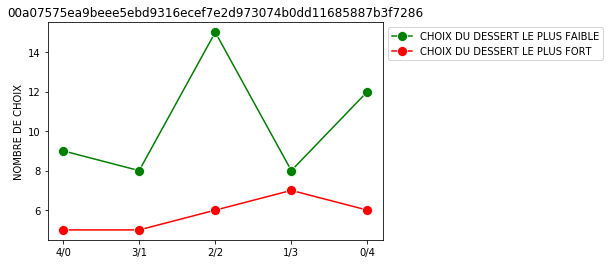

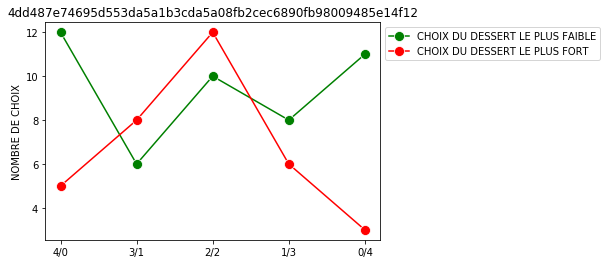

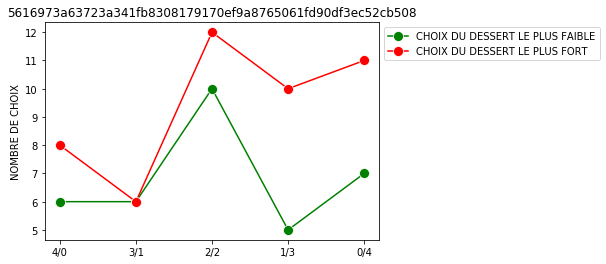

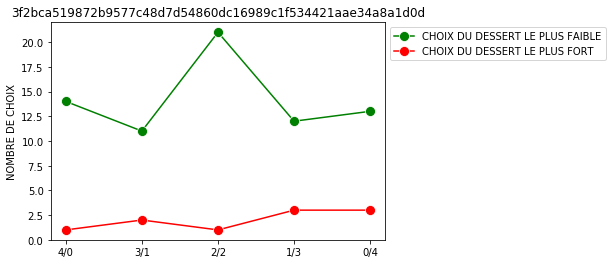

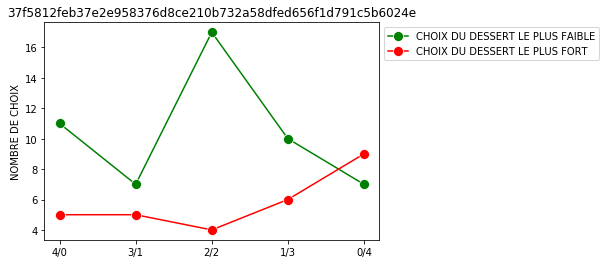

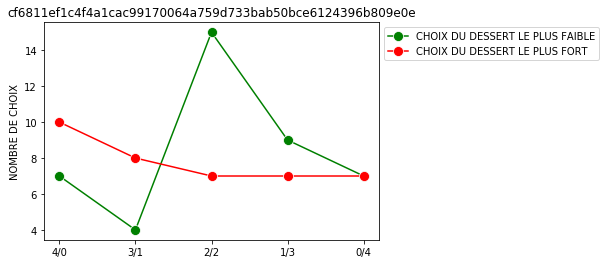

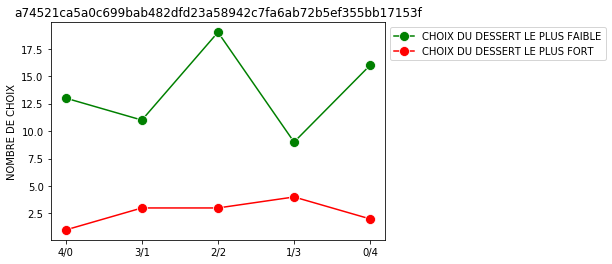

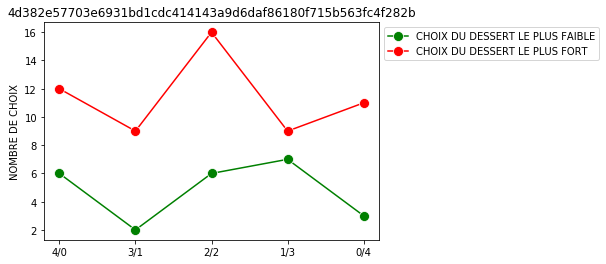

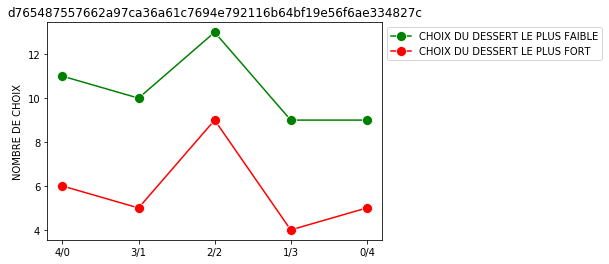

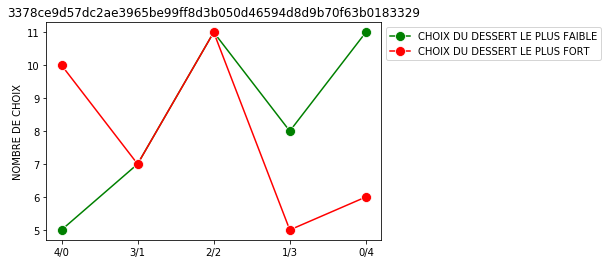

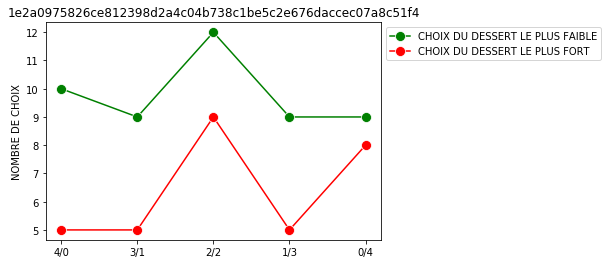

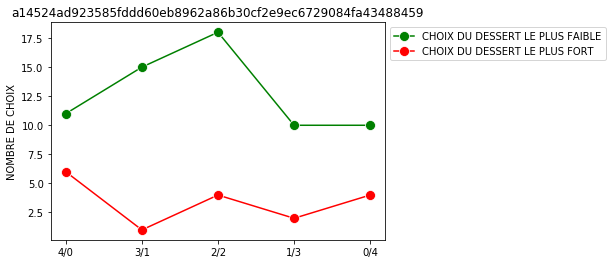

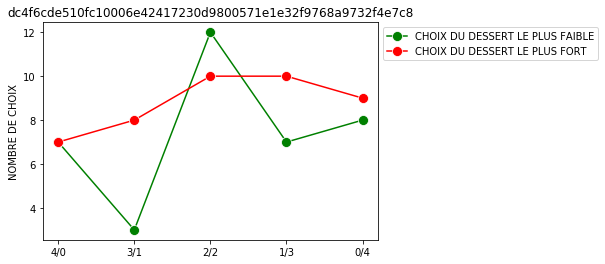

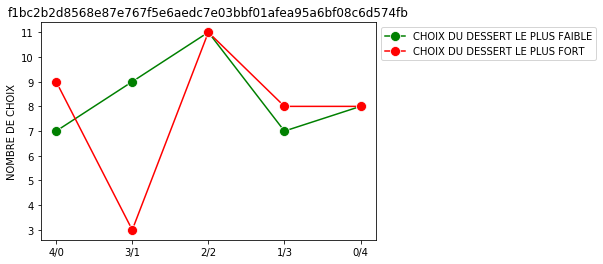

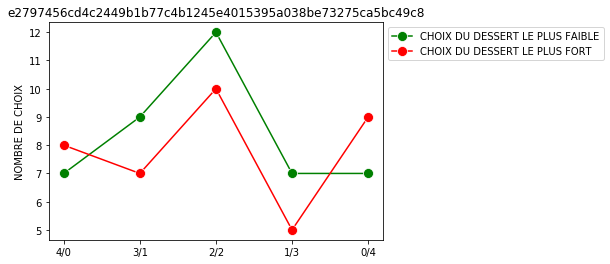

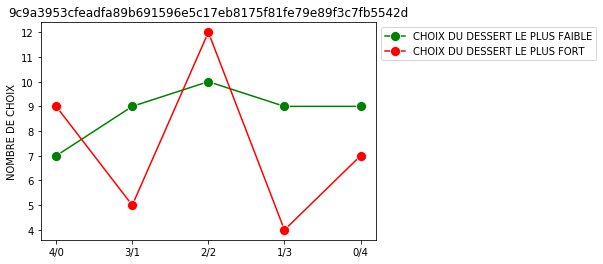

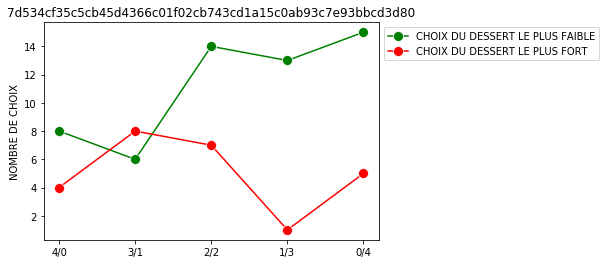

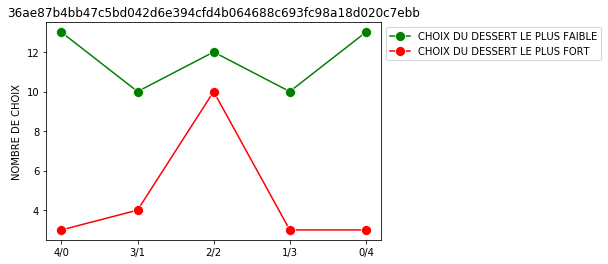

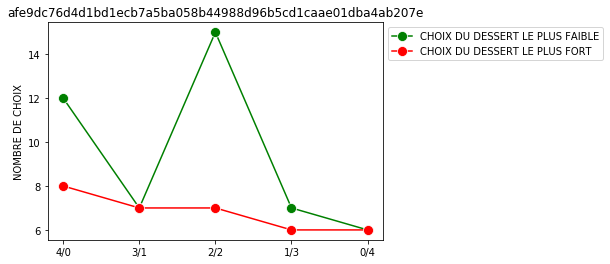

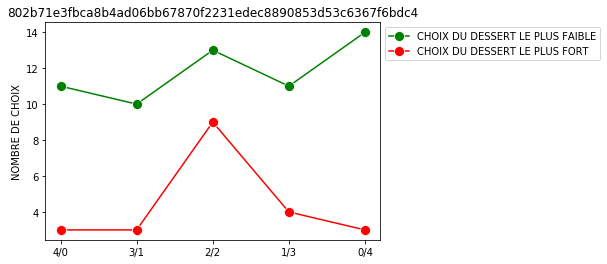

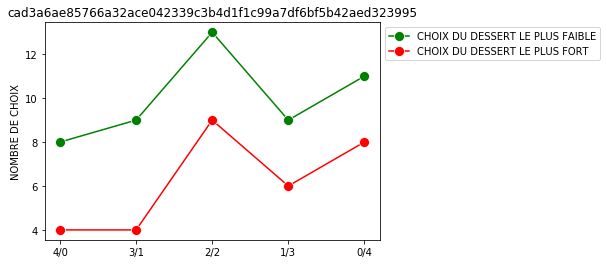

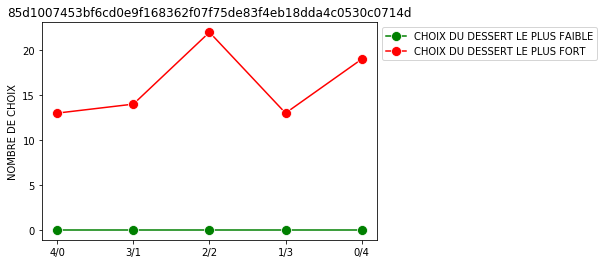

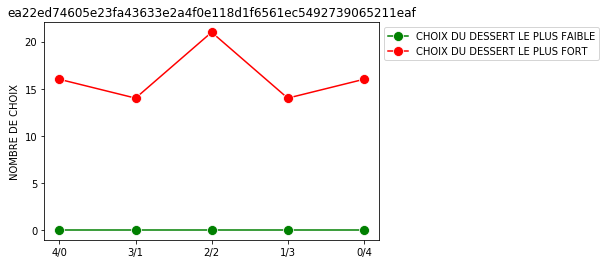

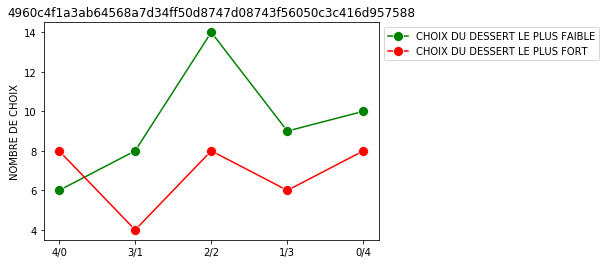

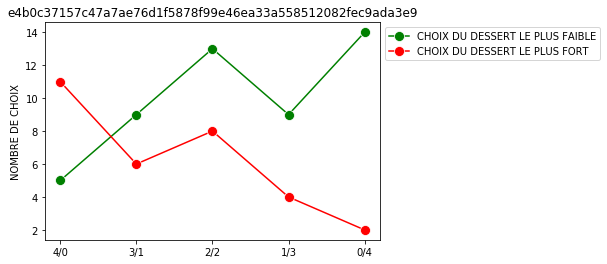

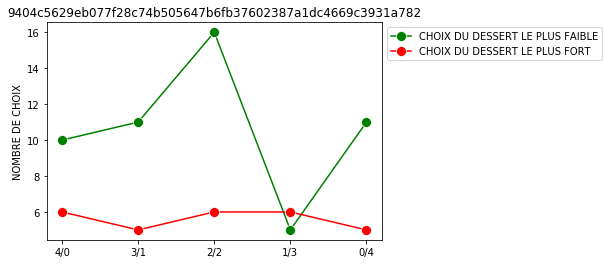

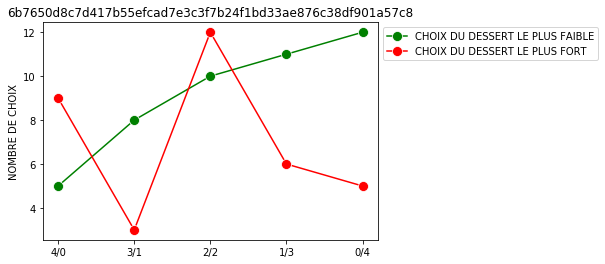

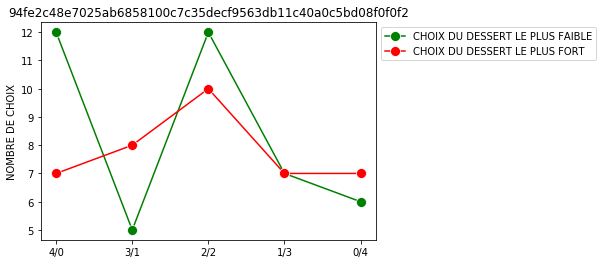

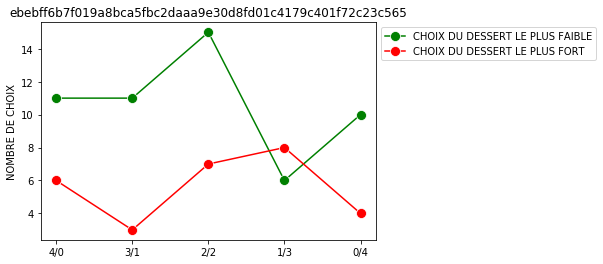

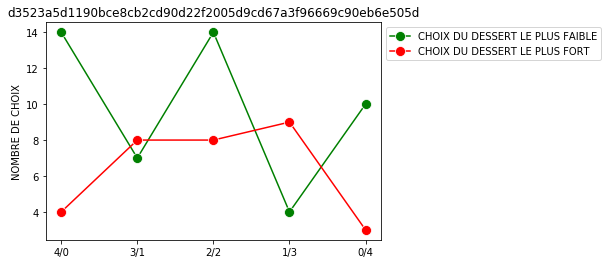

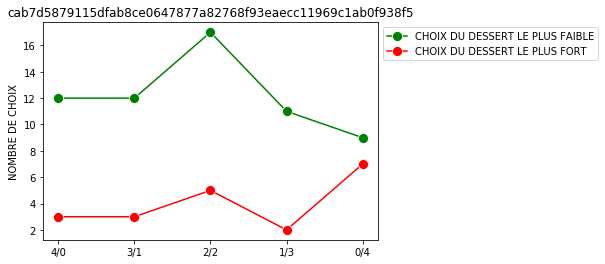

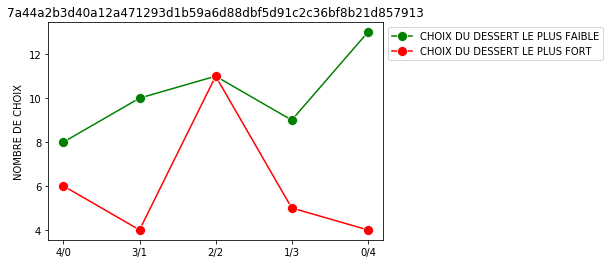

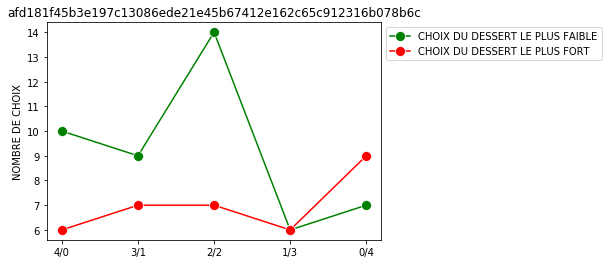

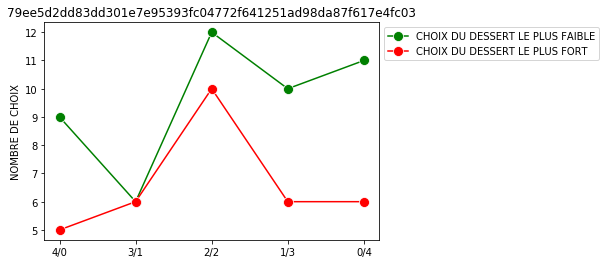

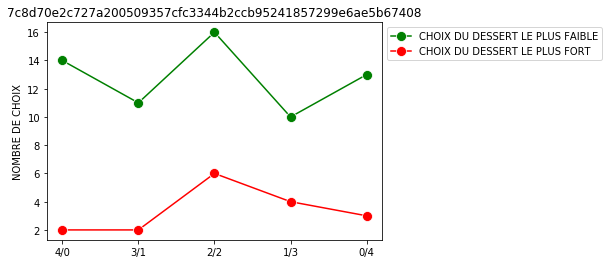

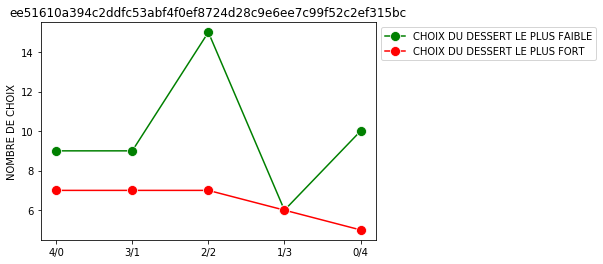

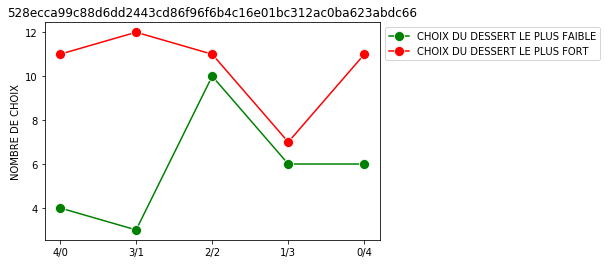

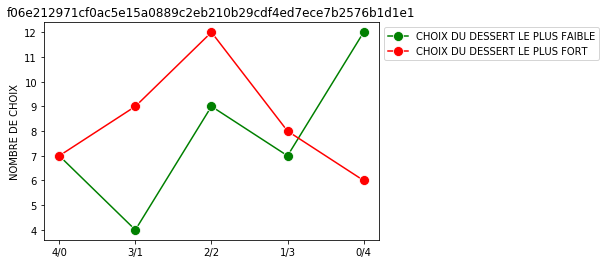

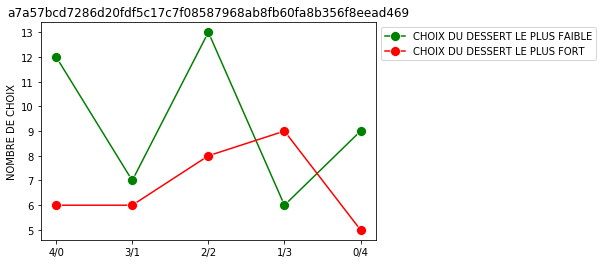

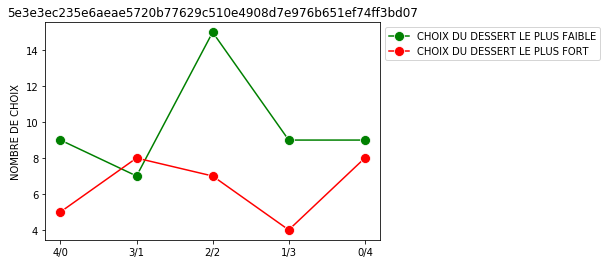

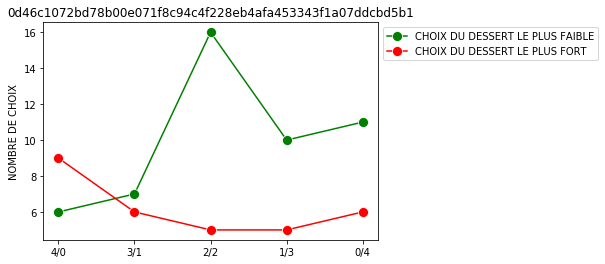

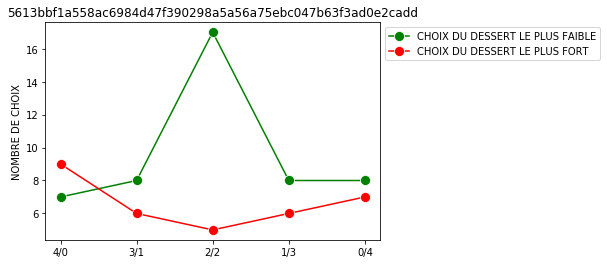

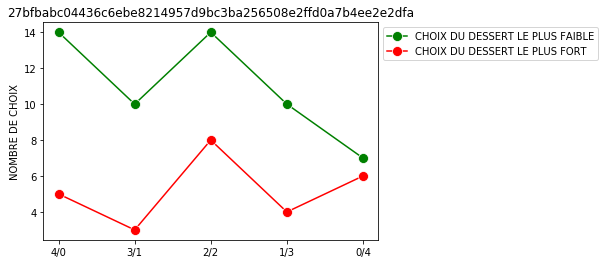

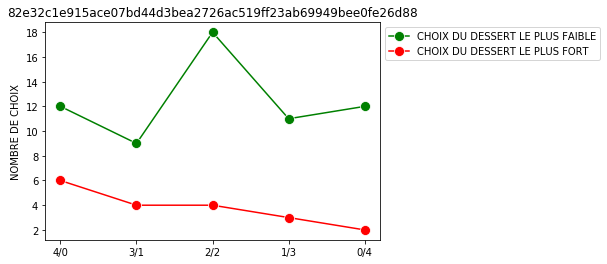

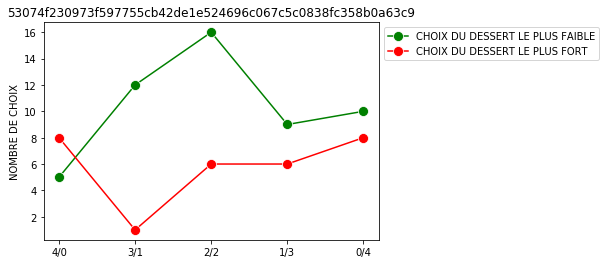

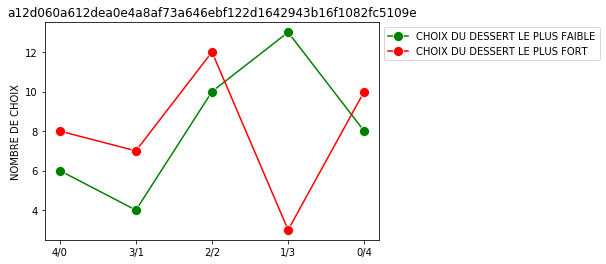

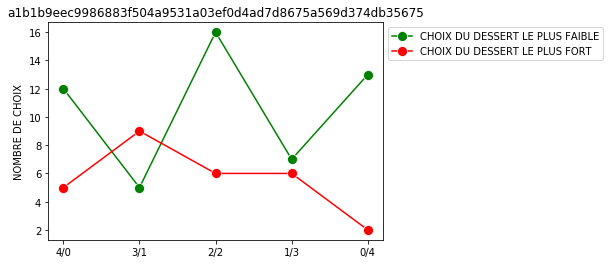

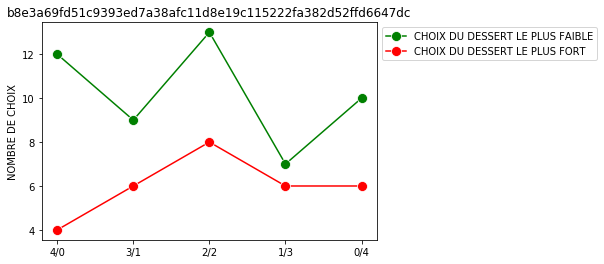

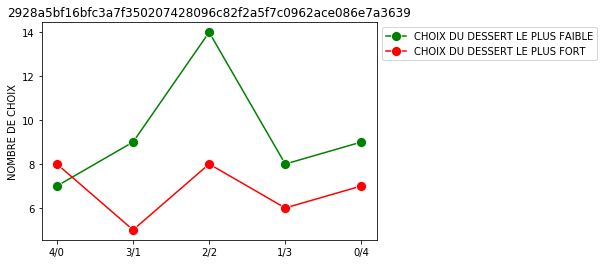

In [13]:
banking.plot('coherence')

#individus[X].droite_gauche('yes' or 'no')
#individus[X].sns()
#individus[X].diff_tdr()

In [12]:
individus[1].droite_gauche('no')

(34, 47)

# MODELE SANS INFLUENCE

In [10]:
def softmax(vec, beta = 1):
    #Retourne [P1,P2]
    exponential = np.exp([element * beta for element in vec])
    probabilities = exponential / np.sum(exponential)
    return probabilities

In [11]:
def Recherche_Beta(personne):
#PARAMETRE ENTREE : le numéro de la personne dans la liste des individus
#PARAMETRE SORTIE : BETA type liste
#PARAMETRE SORTIE : LOG LIKELIHOOD type liste
    
    #La récolte
    P1 = individus[personne].getP1()
    P2 = individus[personne].getP2()
    DESSERT = individus[personne].getDesserts()
    I1, I2 = individus[personne].getInfluence_1and2()
    premier = individus[personne].getChoix()[-1]
    dernier = individus[personne].getChoix()[:-1]
    CHOIX = dernier.insert(0,premier)
    #Fin
    
    BETA = DOMAINE_DE_RECHERCHE
    LL = [] 

    for B in BETA:
        V = []
        for round in range(len(P1)-1):
            fight = [DESSERT.loc[P1[round],'note'],DESSERT.loc[P2[round],'note']]
            probabilities = softmax(fight, beta = B)

            if CHOIX[round] == P1[round]:
                V.append(log(probabilities[0]))
            elif CHOIX[round] == P2[round]:
                V.append(log(probabilities[1]))
            else:
                print('Problème')
                print('\n1: ',CHOIX[round],P1[round])
                print('\n2: ',CHOIX[round],P2[round])

        LL.append(sum(V))

    return BETA, LL

In [12]:
def modele_sans_influence():

    for index in range(len(individus)):
        print('itération N°',index)

        BETA,LL = Recherche_Beta(index)

        individus[index].setLL0(max(LL))
        maximum = max(LL)

        individus[index].setbeta(BETA[LL.index(maximum)]) #Sauvegarde du meilleur BETA


In [13]:
#DOMAINE DE RECHERCHE DU PARAMETRE BETA
DOMAINE_DE_RECHERCHE = [i/100 for i in range(1,501)]

In [14]:
#LANCEMENT DU MODELE
modele_sans_influence()

itération N° 0
itération N° 1
itération N° 2
itération N° 3
itération N° 4
itération N° 5
itération N° 6
itération N° 7
itération N° 8
itération N° 9
itération N° 10
itération N° 11
itération N° 12
itération N° 13
itération N° 14
itération N° 15
itération N° 16
itération N° 17
itération N° 18
itération N° 19
itération N° 20
itération N° 21
itération N° 22
itération N° 23
itération N° 24
itération N° 25
itération N° 26
itération N° 27
itération N° 28
itération N° 29
itération N° 30
itération N° 31
itération N° 32
itération N° 33
itération N° 34
itération N° 35
itération N° 36
itération N° 37
itération N° 38
itération N° 39
itération N° 40
itération N° 41
itération N° 42
itération N° 43
itération N° 44
itération N° 45
itération N° 46
itération N° 47
itération N° 48


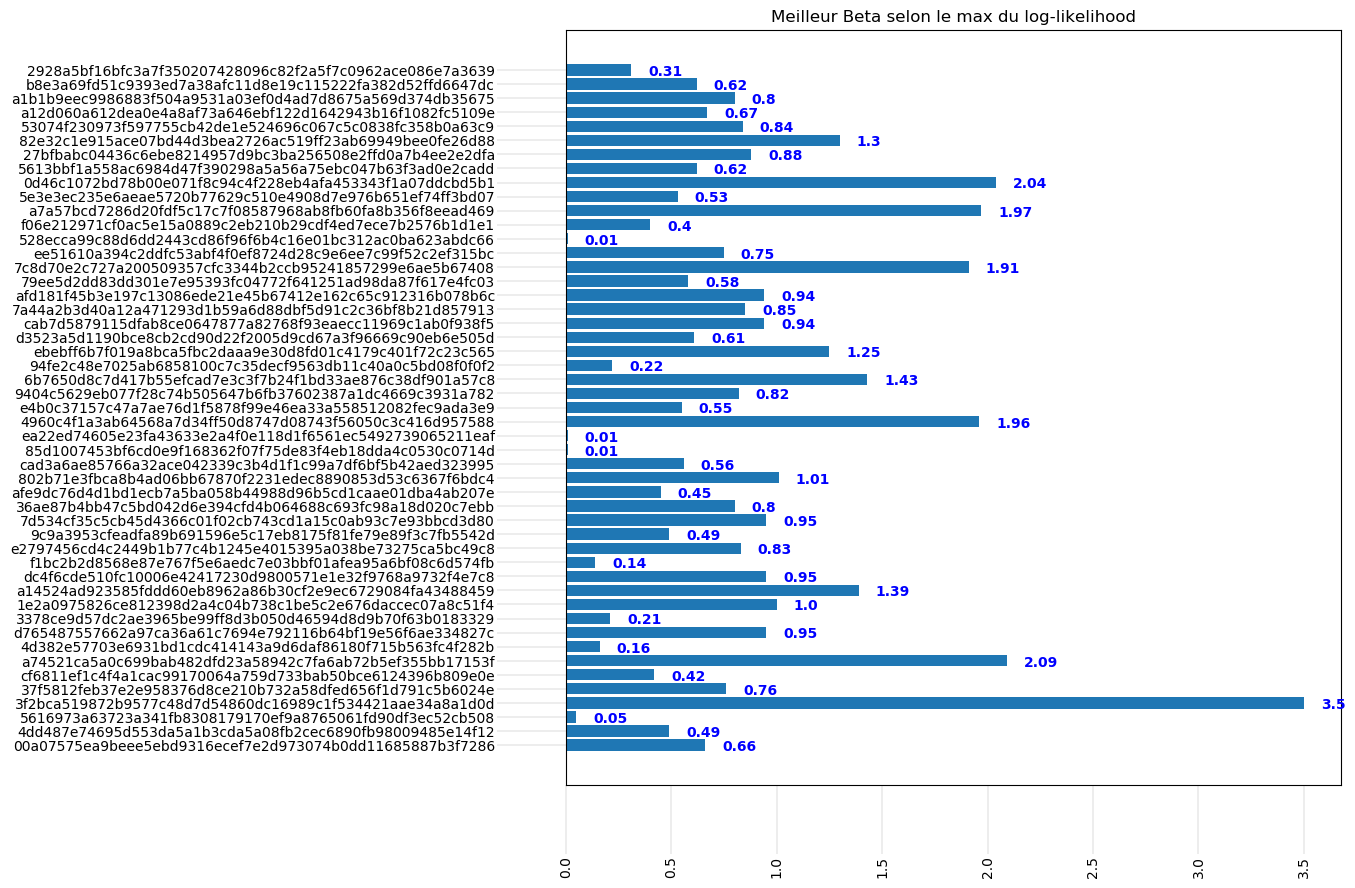

In [15]:
#visualisation des betas obtenus
fig, ax=plt.subplots(dpi=100)
BETA_individus = []
id = []
for i in individus :
    BETA_individus.append(i.getBeta())
    id.append(i.getId())

plt.xticks(rotation = 90)
plt.barh(id,BETA_individus)
ax.tick_params(width=0.1,length=50, pad = 1)

for i, v in enumerate(BETA_individus):
    ax.text(v+0.08, i-0.4, str(v), color='blue', fontweight='bold')

plt.title('Meilleur Beta selon le max du log-likelihood')
plt.gcf().set_size_inches(10,10)

# MODELE LINEAIRE

In [16]:
def Recherche_Beta_Lineaire(personne):
#LA DIFFERENCE AVEC LE BETA PRECEDENT EST QUE L'ON CALCULE BETA UNIQUEMENT SUR LES CAS 2/2
    
    #La récolte
    P1 = individus[personne].getP1()
    P2 = individus[personne].getP2()
    DESSERT = individus[personne].getDesserts()
    I1, I2 = individus[personne].getInfluence_1and2()
    premier = individus[personne].getChoix()[-1]
    dernier = individus[personne].getChoix()[:-1]
    CHOIX = dernier.insert(0,premier)
    #Fin
    BETA = DOMAINE_DE_RECHERCHE
    LL = [] #log-likelihood

    for B in BETA:
        V = []
        for round in range(len(P1)-1):
            if I1[round]==2:
                fight = [DESSERT.loc[P1[round],'note'],DESSERT.loc[P2[round],'note']]
                probabilities = softmax(fight, beta = B)

                if CHOIX[round] == P1[round]:
                    V.append(log(probabilities[0]))
                elif CHOIX[round] == P2[round]:
                    V.append(log(probabilities[1]))
                else:
                    print('Problème')
                    print('\n1: ',CHOIX[round],P1[round])
                    print('\n2: ',CHOIX[round],P2[round])

        LL.append(sum(V))

    return BETA, LL

In [17]:
def Recherche_Alpha(personne):
    #La récolte
    P1 = individus[personne].getP1()
    P2 = individus[personne].getP2()
    DESSERT = individus[personne].getDesserts()
    I1, I2 = individus[personne].getInfluence_1and2()
    premier = individus[personne].getChoix()[-1]
    dernier = individus[personne].getChoix()[:-1]
    CHOIX = dernier.insert(0,premier)
    #Fin
    ALPHA = DOMAINE_DE_RECHERCHE_ALPHA
    LL = [] #log-likelihood

    for a in ALPHA:
        V = []
        for round in range(len(P1)-1):
            fight = [DESSERT.loc[P1[round],'note']+lineaire(a,I1[round]),DESSERT.loc[P2[round],'note']+lineaire(a,I2[round])]
            probabilities = softmax(fight, beta = individus[personne].getBeta_lineaire())

            if CHOIX[round] == P1[round]:
                V.append(log(probabilities[0]))
            elif CHOIX[round] == P2[round]:
                V.append(log(probabilities[1]))
            else:
                print('Problème')
                print('\n1: ',CHOIX[round],P1[round])
                print('\n2: ',CHOIX[round],P2[round])

        LL.append(sum(V))

    return ALPHA, LL

In [18]:
def lineaire(a,n):
  # n = {1,2,3,4}
  # n représente le nombre de personnes qui ont chosii le dessert 1 ou 2
  # N( gauche ) et  N ( droite )
  # Appel de la fonction ---- Note ( gauche ) + lineaire(2, N( gauche ))
    return (a/2)*n-a

In [19]:
def modele_lineaire():
#2 ETAPES

#PREMIERE ETAPE A LA RECHERCHE DE BETA POUR LES CAS 2/2
    for index in range(len(individus)):
        print('Itération N°',index)

        BETA,LL = Recherche_Beta_Lineaire(index)

        maximum = max(LL)

        individus[index].setbeta_lineaire(BETA[LL.index(maximum)])

#DEUXIEME ETAPE A LA RECHERCHE DE ALPHA POUR L'ENSEMBLE DES CAS
    for index in range(len(individus)):

        ALPHA,LL = Recherche_Alpha(index)

        individus[index].setLL1(max(LL))
        maximum = max(LL)

        individus[index].setalpha(ALPHA[LL.index(maximum)])

In [20]:
#DOMAINE DE RECHERCHE DES PARAMETRES
DOMAINE_DE_RECHERCHE = [i/100 for i in range(1,501)]
DOMAINE_DE_RECHERCHE_ALPHA = [i/100 for i in range(1,501)]

In [21]:
modele_lineaire()

Itération N° 0
Itération N° 1
Itération N° 2
Itération N° 3
Itération N° 4
Itération N° 5
Itération N° 6
Itération N° 7
Itération N° 8
Itération N° 9
Itération N° 10
Itération N° 11
Itération N° 12
Itération N° 13
Itération N° 14
Itération N° 15
Itération N° 16
Itération N° 17
Itération N° 18
Itération N° 19
Itération N° 20
Itération N° 21
Itération N° 22
Itération N° 23
Itération N° 24
Itération N° 25
Itération N° 26
Itération N° 27
Itération N° 28
Itération N° 29
Itération N° 30
Itération N° 31
Itération N° 32
Itération N° 33
Itération N° 34
Itération N° 35
Itération N° 36
Itération N° 37
Itération N° 38
Itération N° 39
Itération N° 40
Itération N° 41
Itération N° 42
Itération N° 43
Itération N° 44
Itération N° 45
Itération N° 46
Itération N° 47
Itération N° 48


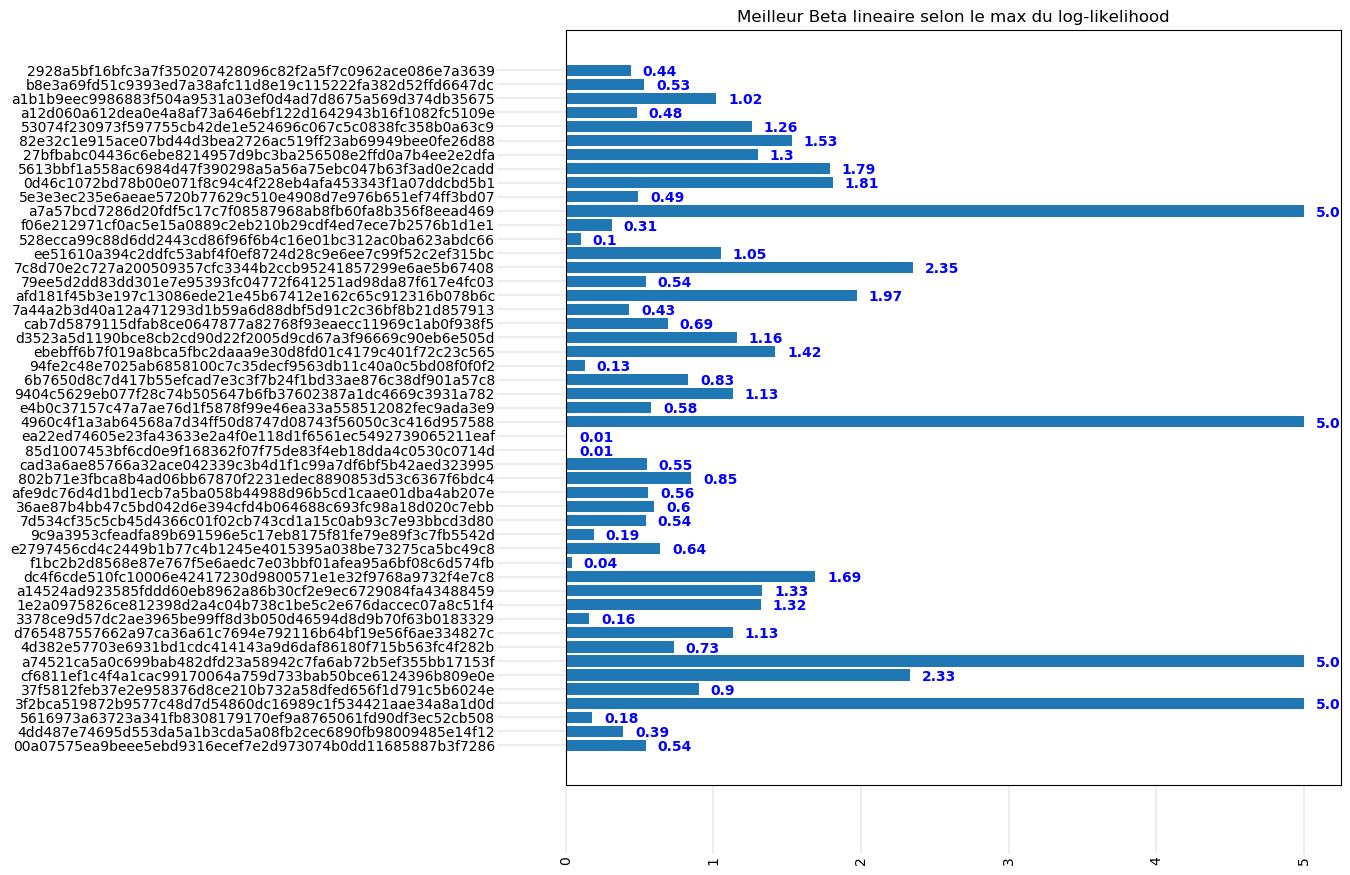

In [22]:
#VISUALISATION
fig, ax=plt.subplots(dpi=100)
BETA_individus = []
id = []
for i in individus :
    BETA_individus.append(i.getBeta_lineaire())
    id.append(i.getId())

plt.xticks(rotation = 90)
plt.barh(id,BETA_individus)
ax.tick_params(width=0.1,length=50, pad = 1)

for i, v in enumerate(BETA_individus):
    ax.text(v+0.08, i-0.4, str(v), color='blue', fontweight='bold')

plt.title('Meilleur Beta lineaire selon le max du log-likelihood')
plt.gcf().set_size_inches(10,10)

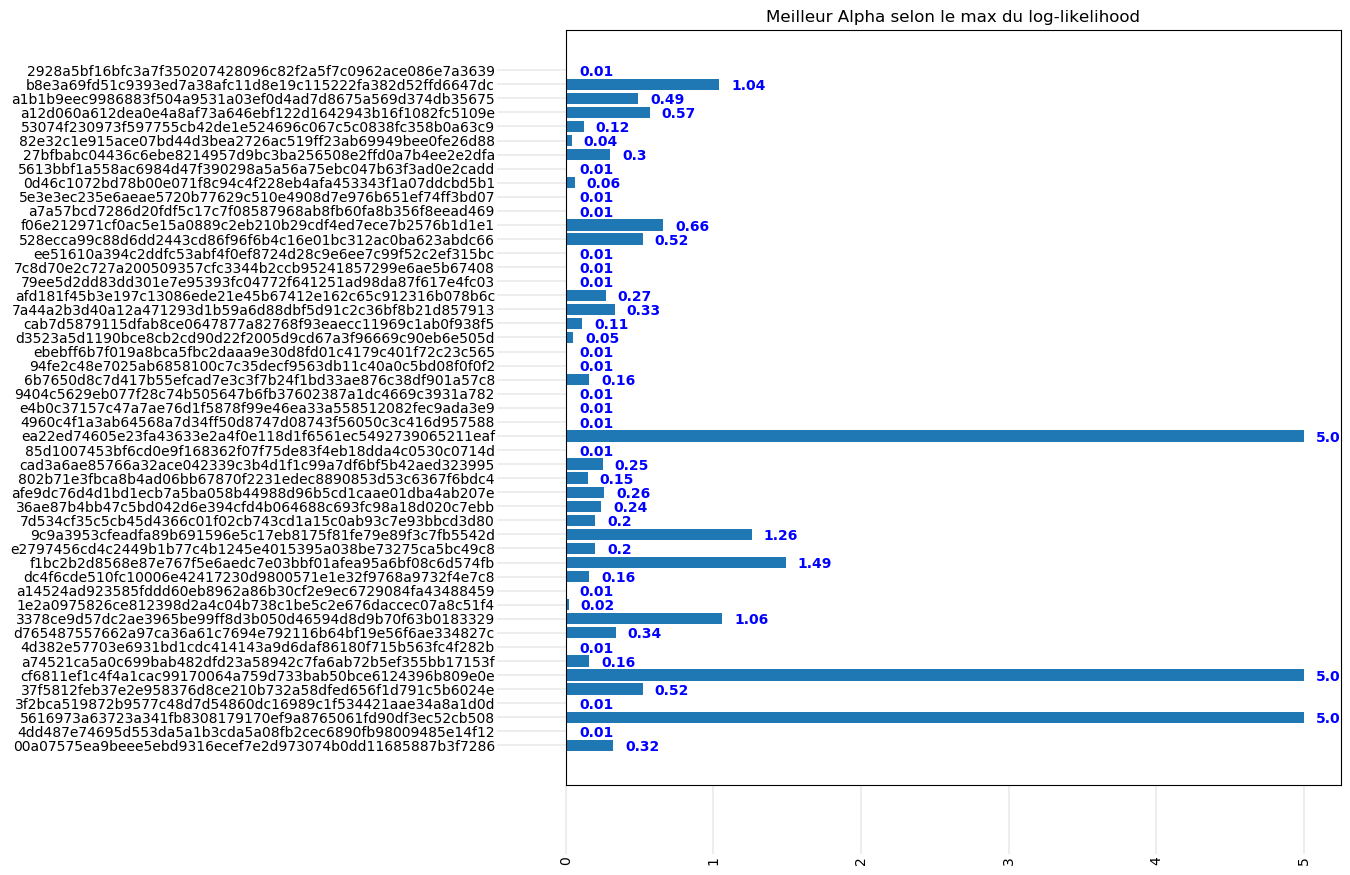

In [23]:
fig, ax=plt.subplots(dpi=100)
ALPHA_individus = []
id = []
for i in individus :
    ALPHA_individus.append(i.getAlpha())
    id.append(i.getId())

plt.xticks(rotation = 90)
plt.barh(id,ALPHA_individus)
ax.tick_params(width=0.1,length=50, pad = 1)

for i, v in enumerate(ALPHA_individus):
    ax.text(v+0.08, i-0.4, str(v), color='blue', fontweight='bold')

plt.title('Meilleur Alpha selon le max du log-likelihood')
plt.gcf().set_size_inches(10,10)

# MODELE TRIGGERING

In [24]:
def Recherche_DECLENCHEMENT(personne):
  #La récolte
    P1 = individus[personne].getP1()
    P2 = individus[personne].getP2()
    DESSERT = individus[personne].getDesserts()
    I1, I2 = individus[personne].getInfluence_1and2()
    premier = individus[personne].getChoix()[-1]
    dernier = individus[personne].getChoix()[:-1]
    CHOIX = dernier.insert(0,premier)
    #Fin
    D = DOMAINE_DE_RECHERCHE_D
    LL = [] #log-likelihood

    for a in D:
        V = []
        for round in range(len(P1)-1):
            fight = [DESSERT.loc[P1[round],'note']+NON_LINEAIRE(a,I1[round]),DESSERT.loc[P2[round],'note']+NON_LINEAIRE(a,I2[round])]
            probabilities = softmax(fight, beta = individus[personne].getBeta_lineaire())

            if CHOIX[round] == P1[round]:
                V.append(log(probabilities[0]))
            elif CHOIX[round] == P2[round]:
                V.append(log(probabilities[1]))
            else:
                print('Problème')
                print('\n1: ',CHOIX[round],P1[round])
                print('\n2: ',CHOIX[round],P2[round])

        LL.append(sum(V))

    return D, LL

In [25]:
def modele_declenchement():

#ATTENTION, NOUS AVONS DEJA LE PARAMETRE BETA LINEAIRE !
#DONC IL N'Y A QU'UNE ETAPE !

    for index in range(len(individus)):
        print('Itération N°',index)
        DECLENCHEMENT,LL = Recherche_DECLENCHEMENT(index)

        individus[index].setLL2(max(LL))
        maximum = max(LL)

        individus[index].setD(DECLENCHEMENT[LL.index(maximum)])

In [26]:
def NON_LINEAIRE(a,n):
    if n == 4:
        return a
    else:
        return 0

In [27]:
DOMAINE_DE_RECHERCHE_D = [i/100 for i in range(1,1000)]

In [28]:
modele_declenchement()

Itération N° 0
Itération N° 1
Itération N° 2
Itération N° 3
Itération N° 4
Itération N° 5
Itération N° 6
Itération N° 7
Itération N° 8
Itération N° 9
Itération N° 10
Itération N° 11
Itération N° 12
Itération N° 13
Itération N° 14
Itération N° 15
Itération N° 16
Itération N° 17
Itération N° 18
Itération N° 19
Itération N° 20
Itération N° 21
Itération N° 22
Itération N° 23
Itération N° 24
Itération N° 25
Itération N° 26
Itération N° 27
Itération N° 28
Itération N° 29
Itération N° 30
Itération N° 31
Itération N° 32
Itération N° 33
Itération N° 34
Itération N° 35
Itération N° 36
Itération N° 37
Itération N° 38
Itération N° 39
Itération N° 40
Itération N° 41
Itération N° 42
Itération N° 43
Itération N° 44
Itération N° 45
Itération N° 46
Itération N° 47
Itération N° 48


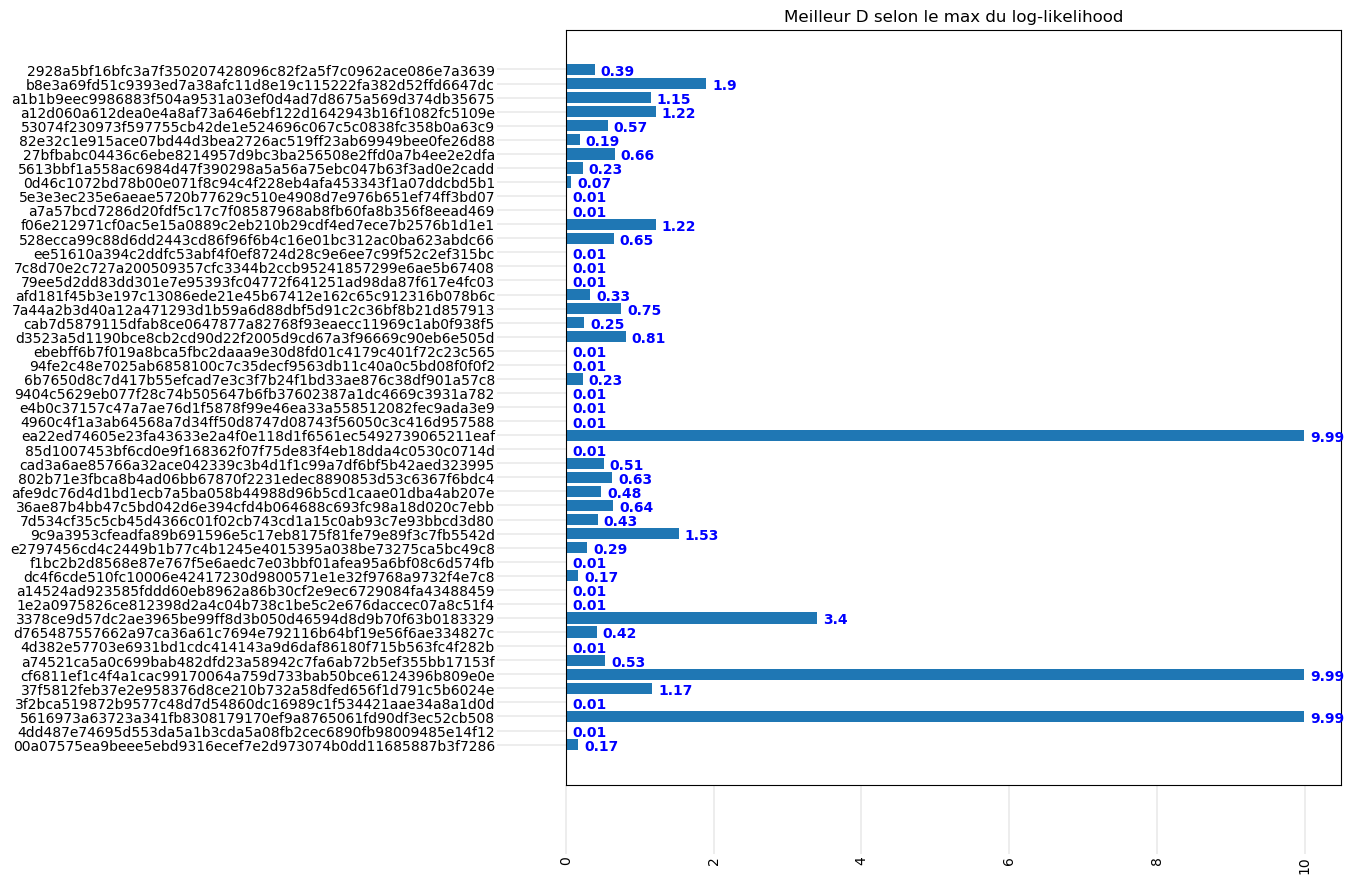

In [29]:
#VISUALISATION
fig, ax=plt.subplots(dpi=100)
D_individus = []
id = []
for i in individus :
    D_individus.append(i.getD())
    id.append(i.getId())

plt.xticks(rotation = 90)
plt.barh(id,D_individus)
ax.tick_params(width=0.1,length=50, pad = 1)

for i, v in enumerate(D_individus):
    ax.text(v+0.08, i-0.4, str(v), color='blue', fontweight='bold')

plt.title('Meilleur D selon le max du log-likelihood')
plt.gcf().set_size_inches(10,10)

# BIC's

L'OBJECTIF EST DE MINIMISER LE CRITERE BIC POUR OBTENIR LE MEILLEUR MODELE

In [30]:
def BIC(LL,N,parameter):
#PARAMETRE ENTREE : LOG LIKELIHOOD
#PARAMETRE ENTREE : NOMBRE DE CHOIX EFFECTUE
#PARAMETRE ENTREE : NOMBRE DE PARAMETRES LIBRES DU MODELE

#PARAMETRE SORTIE : BIC valeur

    return -2*LL+parameter*log(N)

In [31]:
#LL_0 : LOG LIKELIHOOD SANS INFLUENCE
#LL_1 : LOG LIKELIHOOD LINEAIRE
#LL_2 : LOG LIKELIHOOD TRIGGERING

N = 82
BIC_1 = []
BIC_2 = []
BIC_3 = []
x = []


for i in individus:
    x.append(i.getId())
    BIC_1.append(BIC(i.getLL0(),N,1))
    BIC_2.append(BIC(i.getLL1(),N,2))
    BIC_3.append(BIC(i.getLL2(),N,2))

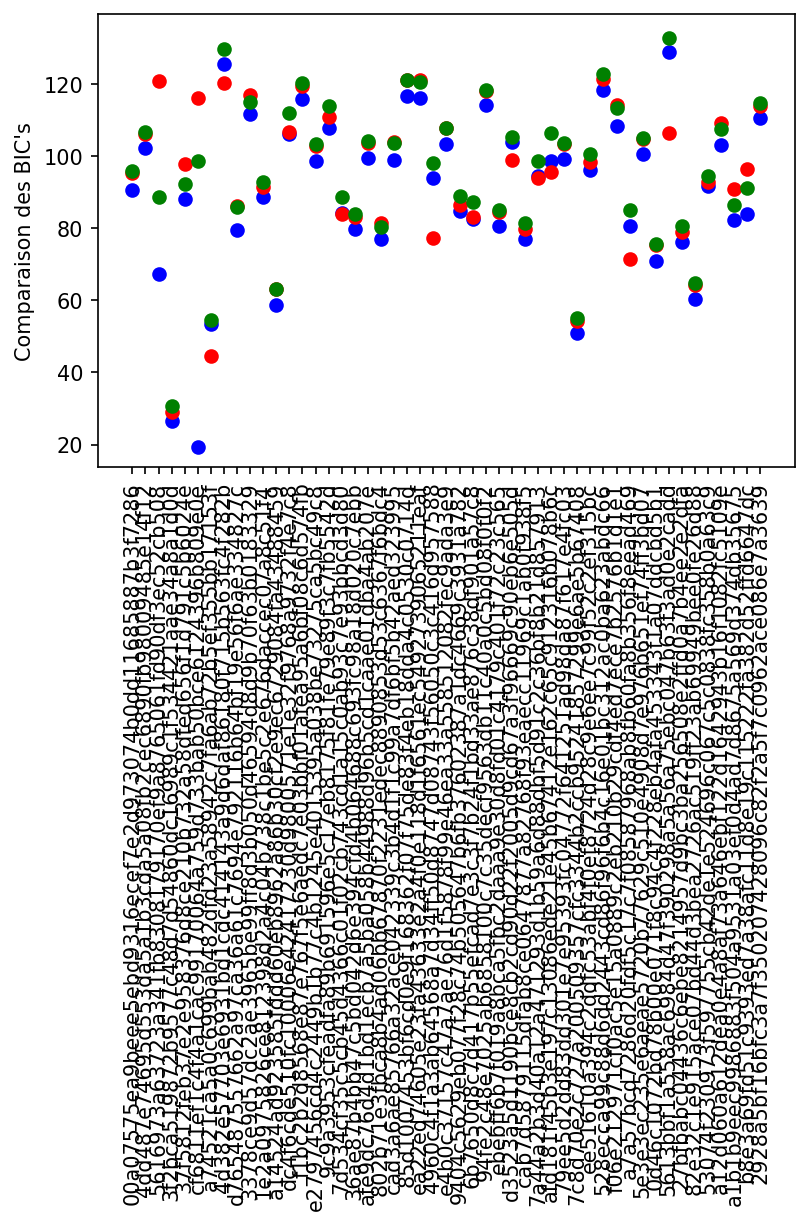

In [39]:
#VISUALISATION INDIVIDUELLE
fig, ax=plt.subplots(dpi=150)
plt.xticks(rotation = 90)

plt.scatter(x,BIC_1,color='blue')
plt.scatter(x,BIC_2,color='red')
plt.scatter(x,BIC_3,color='green')
plt.ylabel('Comparaison des BIC\'s')
plt.show()

In [49]:
def best(a,b,c):
    
#MINIMUM ?

    if (a < b and a < c):
        return 'NO INFLUENCE'
    elif (b < a and b < c):
        return 'LINEAR'
    elif (c < a and c < b):
        return 'TRIGGERING'

In [50]:
histogramme = []

ROUND = 0
for i in individus:
    i.setMODELE(best(BIC_1[ROUND],BIC_2[ROUND],BIC_3[ROUND]))
    ROUND = ROUND + 1
    histogramme.append(i.getMODELE())

<function matplotlib.pyplot.show(*args, **kw)>

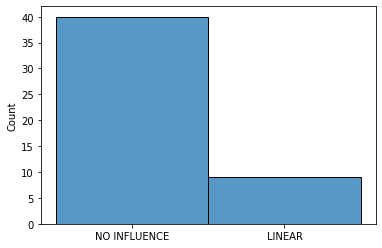

In [61]:
#VISUALISATION DE GROUPE
sns.histplot(histogramme)
plt.show

In [36]:
#ON POURRA ACCEDER AU MEILLEUR MODELE VIA LA COMMANDE INDIVIDU.getMODELE()